# Project: Investigating the Profitability of Films
## Table of Contents
<ul>
<li><a href="#introduction">Introduction</a></li>
    
<li><a href="#wrangling">Data Wrangling</a></li>

<li><a href="#eda">Exploratory Data Analysis</a></li>
        
<li><a href="#conclusions">Conclusions</a></li>
  
<li><a href="#limitation">Limitations</a></li>
</ul>

## Movie Data Analysis
<a id = 'introduction'></a>
### Introduction
This data was obtained from [The Movie Database](https://www.themoviedb.org/about) (TMDb), "a community  built movie and TV database". Each row correspond to a movie and include a range of data about each film. Relevant data to be used in the following analysis include the following variables:
- original_title
- genres
- release_year
- release_date
- budget_adj (budget in terms of 2010 dollars)
- revenue_adj (revenue in terms of 2010 dollars)

In this report, I will explore the following questions:
1. How has profitability of making films changed over time?
2. How does profitability vary for films releases in different months?
3. How does a film's budget relates to its profitability?
4. How does a film's genre relates to its profitability?
Throughout my analysis, film profitacility ( as calculated by subtracting each film's adjusted budget from its adjusted revenue) will be the dependent variable, while release year, release month, budget, revenue and genre will be the indepedent variable.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load the dataset and view
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The data in some columns are seperated by pipe character (|) but if the column will be useful in the analysis, the | will have to be removed to derive useful insights from the columns

In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

* The dataset has 10866 rows and 21 columns.
* There are missing values in some of the columns. However, some columns are not insightful and will have to be dropped. These columns are id, imdb_id, cast, homepage, tagline, keywords, overview, production_companies, release_date, budget, revenue and vote_count
* The budget_adj and revenue_adj will be used in place of budget and revenue since they are adjusted for 2010 dollar. Hence, are more relevant for comparison.

In [6]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

<a id='wrangling'></a>
## Data Wrangling

In [7]:
# drop the uninsightful columns
df.drop(['id', 'imdb_id', 'budget', 'revenue',  'cast', 'homepage','tagline', 
         'keywords', 'overview','production_companies', 
         'budget','revenue', 'vote_count'], 
        axis = 1, inplace = True)

In [8]:
# Get a descrption of the dataset
df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,102.070863,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,31.381405,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,111.000000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


* The summary statistics above shows that the minimun value for runtime, budget_adj and revenue_adj are zero, this does not really make sense. So, further analysis will be carried out to determine the next course of action. But first, I will check the number of movies that has zero budget, revenue and runtime.

In [9]:
# The number of movies with zero budget
df.query('budget_adj == 0').count().budget_adj

5696

In [10]:
# The number of movies with zero revenue
df.query('revenue_adj == 0').count().revenue_adj

6016

In [11]:
# The number of movies with zero runtime
df.query('runtime == 0').count().runtime

31

* Movies with zero budget and revenue is quite many and hence will be forwardfilled while movies with zero runtime will be dropped. 
* I decided to forwardfill this value because dropping them will lead us to lose a lot of data.

In [12]:
# drop movies with zero runtime
df = df[df.runtime != 0]

In [13]:
# replace the zero values in budget_adj and revenue_adj with NaN
df['budget_adj'] = df['budget_adj'].replace(0, np.NAN)
df['revenue_adj'] = df['revenue_adj'].replace(0, np.NAN)

In [14]:
# let's see how many null values are left
df.isnull().sum()

popularity           0
original_title       0
director            42
runtime              0
genres              22
release_date         0
vote_average         0
release_year         0
budget_adj        5668
revenue_adj       5985
dtype: int64

In [15]:
# Drop rows with null values in director and genres columns
df = df.dropna(subset=['director', 'genres'])

In [16]:
# Backfill missing values in bugdet_adj and revenue_adj 
df.fillna(method = 'ffill', inplace = True)

In [17]:
df.isnull().sum()

popularity        0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [18]:
df.shape

(10773, 10)

* There are no null values in the dataset anymore. And I am left with 10773 observations and 9 columns.
* Next, I will check for duplicates and remove any found

In [19]:
# Check for duplicates
df.duplicated().sum()

1

In [20]:
# Remove duplicates
df.drop_duplicates(inplace = True)

In [21]:
df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10772.000000,10772.000000,10772.000000,10772.000000,1.077200e+04,1.077200e+04
mean,0.650643,102.455347,5.972289,2001.265503,2.706367e+07,7.341960e+07
std,1.003319,30.379156,0.932877,12.825332,3.538083e+07,1.508924e+08
min,0.000188,2.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.209987,90.000000,5.400000,1995.000000,4.604091e+06,2.509532e+06
50%,0.386176,99.000000,6.000000,2006.000000,1.455379e+07,2.145204e+07
75%,0.718889,112.000000,6.600000,2011.000000,3.500000e+07,7.530421e+07
max,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


* The dataset has one duplicate and it has been removed.
* From the description table above, runtime, budget_dj and revenue_adj has reasonable values now.
* The data include movies from 1960 to 2015.
* The next thing is to derive profit column and recode the genres so that it will be more meaning.

In [22]:
# Create a Profit column from revenue_adj and budget_adj
df['profit'] = df['revenue_adj'] - df['budget_adj']

In [23]:
# get dummy variables for genres
df_dummy = df['genres'].str.get_dummies()

In [24]:
# Join the clean dataframe with the dummy dataframe
df = pd.concat([df, df_dummy], axis=1)

df.head()

,popularity,original_title,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,...,0,0,0,0,0,1,0,1,0,0
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08,...,0,0,0,0,0,1,0,1,0,0
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08,...,0,0,0,0,0,1,0,1,0,0
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09,...,0,0,0,0,0,1,0,0,0,0
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# I will drop the genres column since it has been splitted up
df.drop('genres', axis = 1, inplace = True)

In [26]:
# Change the format of release_date to datatime format
df['release_date'] = pd.to_datetime(df['release_date'])

In [27]:
# Extract month from release_date column
df['release_month'] = df['release_date'].dt.month_name(locale = 'English')

Now I will drop the release_date column

In [28]:
# drop release_date column
df.drop('release_date', axis=1, inplace = True)

<a id ='eda'></a>
## Exploratory Data Analysis
### Research Question 1: How does a film's genre relates to its profitability? 


In [29]:
# get the total profit in each genre
profit_genre = df.groupby('profit').sum()
profit_genre.head()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
profit,,,,,,,,,,,,,,,,,,,,,
-4.139124e+08,0.628437,144,12.9,4020,8.500000e+08,2.217514e+07,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
-2.249399e+08,0.451088,299,16.1,6018,6.814516e+08,6.631835e+06,0,0,0,2,...,0,0,0,0,2,0,0,1,0,0
-1.998365e+08,1.210502,78,6.6,1995,2.504192e+08,5.058267e+07,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
-1.648016e+08,0.952027,99,7.2,2001,1.687139e+08,3.912290e+06,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
-1.551102e+08,1.214510,149,6.0,2013,2.386885e+08,8.357833e+07,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
profit_genre.columns

Index(['popularity', 'runtime', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [31]:
profit_genre = profit_genre.drop(['popularity', 'runtime', 'vote_average',
                                  'release_year','budget_adj', 'revenue_adj'], axis = 1)

In [32]:
# sort the profit in each genre in descending order
profit_genre = profit_genre.sum().sort_values(ascending = False)

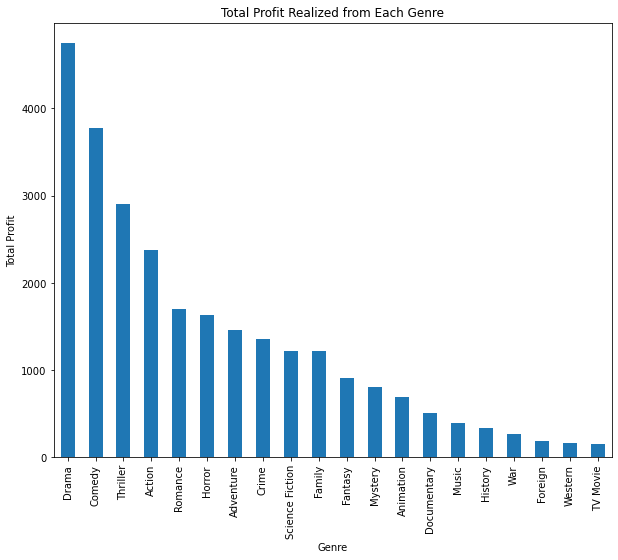

In [33]:
# plot the total profit realized from each genre
profit_genre.plot(kind = 'bar', figsize = (10,8))
plt.title('Total Profit Realized from Each Genre')
plt.xlabel('Genre')
plt.ylabel('Total Profit');

**From the above plot, it can be seen that the most profitable genre is Drama followed by Comedy, Thriller and Action.**
* **The least profitable genre is TV Movie.**

### Research Question 2: How has profitability of making films changed over time?

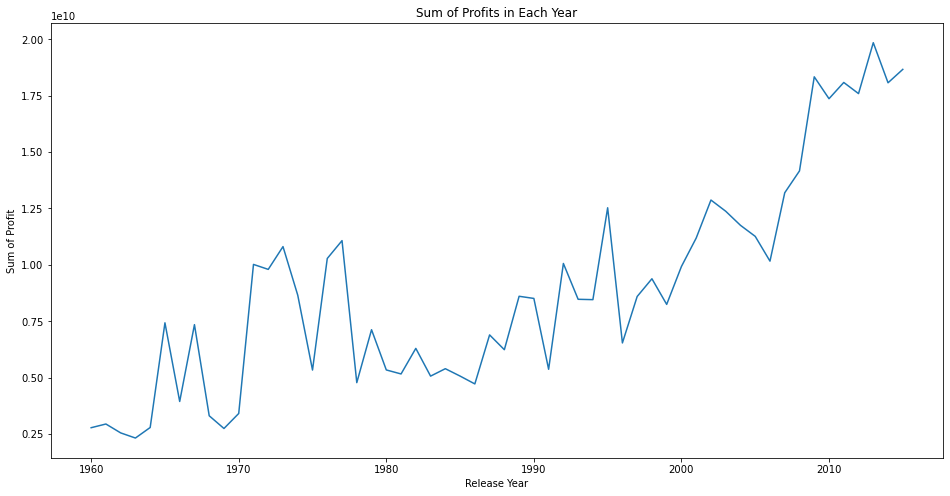

In [34]:
#defining grouping by year
movie=df.groupby('release_year')['profit'].sum()

movie.plot(kind='line', figsize=(16,8)); #plotting bar chart
plt.title('Sum of Profits in Each Year')
plt.xlabel('Release Year')
plt.ylabel('Sum of Profit');

**The plot above shows that there is an overall increase in the profits made along the years. Although, it is flunctuating**

### Research Question 3: How does profitability vary for films releases in different months?

In [35]:
# Get the sum of profit for each month
df_month = df.groupby('release_month').sum()
month = df.groupby('release_month')['profit'].sum()

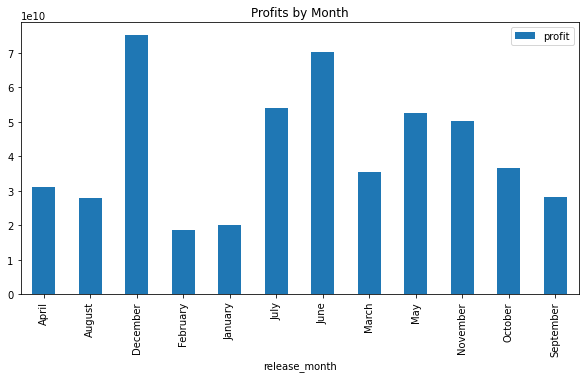

In [36]:
# Bar chart of profit in each month
month.to_frame().sort_values('release_month').plot(kind='bar', figsize=(10,5), title='Profits by Month');

**The bar plot shows that the highest profit for films is made in December. This could be because of the holidays in December which prompt people to spend more time relaxing; probably watching movies**

### Research Question 4: How does a film's budget relates to its profitability?

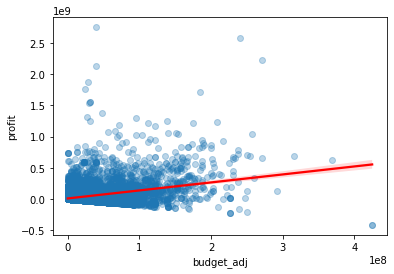

In [37]:
# Scatterplot of budget_adj and profit
sns.regplot(x='budget_adj', y='profit', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'});

**The scatter plot shows that there is a positive relationship between budget and profit. This means that the higher the budget, the higher the profit.**

In [38]:
# a function to find unique values for a given column
def unique_values(column):
    return column.unique()

In [39]:
unique_values(df.director)

array(['Colin Trevorrow', 'George Miller', 'Robert Schwentke', ...,
       'Alan Rafkin', 'Bruce Brown', 'Harold P. Warren'], dtype=object)

In [40]:
# who are the top ten directors
df.groupby('director')['director'].value_counts().sort_values(ascending = False).head(10)

director           director         
Woody Allen        Woody Allen          45
Clint Eastwood     Clint Eastwood       34
Steven Spielberg   Steven Spielberg     29
Martin Scorsese    Martin Scorsese      29
Ridley Scott       Ridley Scott         23
Steven Soderbergh  Steven Soderbergh    22
Ron Howard         Ron Howard           22
Joel Schumacher    Joel Schumacher      21
Brian De Palma     Brian De Palma       20
Wes Craven         Wes Craven           19
Name: director, dtype: int64

In [41]:
# top 10 movies with the highest vote average
df.groupby('original_title')['vote_average'].mean().sort_values(ascending = False).head(10)


original_title
The Story of Film: An Odyssey                                      9.2
The Mask You Live In                                               8.9
Black Mirror: White Christmas                                      8.8
Life Cycles                                                        8.8
Pink Floyd: Pulse                                                  8.7
The Art of Flight                                                  8.5
A Personal Journey with Martin Scorsese Through American Movies    8.5
Dave Chappelle: Killin' Them Softly                                8.5
Queen - Rock Montreal                                              8.5
The Shawshank Redemption                                           8.4
Name: vote_average, dtype: float64

In [42]:
# top 10 movies with the highest popularity
df.groupby('original_title')['popularity'].mean().sort_values(ascending = False).head(10)

original_title
Jurassic World                           32.985763
Mad Max: Fury Road                       28.419936
Interstellar                             24.949134
Guardians of the Galaxy                  14.311205
Insurgent                                13.112507
Captain America: The Winter Soldier      12.971027
Star Wars                                12.037933
John Wick                                11.422751
Star Wars: The Force Awakens             11.173104
The Hunger Games: Mockingjay - Part 1    10.739009
Name: popularity, dtype: float64

In [43]:
df[df.original_title == 'Star Wars'].T

,1329
popularity,12.037933
original_title,Star Wars
director,George Lucas
runtime,121
vote_average,7.9
release_year,1977
budget_adj,39575591.358274
revenue_adj,2789712242.27745
profit,2750136650.919176
Action,1


In [44]:
df[df.original_title == 'Avatar'].T

,1386
popularity,9.432768
original_title,Avatar
director,James Cameron
runtime,162
vote_average,7.1
release_year,2009
budget_adj,240886902.887613
revenue_adj,2827123750.41189
profit,2586236847.524277
Action,1


<a id = 'conclusions'></a>
## Conclusion.
The TMDb is a rich dataset that contains information about different movies. From the analysis, it is seen that:
* drama, comedy, thriller and action movies are the most profitable genres.
* from 1960 to 2015, the amount of pprofit made from films increased along the years and the highest profit is made in December.
* Woody Allen directed the highest number of movies from 1960 to 2015
* there is a positive correlation between film budget and profit. The higher the budget, the more likely to make more profit.

<a id = 'limitation'></a>
## Limitations
* During data cleaning, forwardfilling of missing values in revenue_adj and budget_adj may lead to some inaccuracy in the analysis.
* some movies have more than one director and since I did not seperate them, it may not be accurate that Woody Allen directed the highest number of movies.